# Employee Performance and Retention Analysis

## Objective
This project aims to develop an Employee Performance and Retention Analysis using a real-world dataset. The goal is to apply concepts from probability, statistics, machine learning, and deep learning to analyze employee data and predict performance and retention trends.

## Phase 1 - Data Collection and Exploratory Data Analysis (EDA)


### Step 1 - Data Collection and Preprocessing


In [64]:
# Importing the Libraires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_squared_error


In [65]:
df = pd.read_csv("employee_data.csv")
df.head()

,Employee ID,Name,Age,Department,Salary,Years at Company,Performance Score,Attrition
0,E00001,Employee_1,50,Finance,59681.64,10,1.00,Yes
1,E00002,Employee_2,36,Sales,104471.61,7,1.00,Yes
2,E00003,Employee_3,29,Sales,95948.71,3,1.49,Yes
3,E00004,Employee_4,42,Marketing,69485.83,5,1.00,Yes
4,E00005,Employee_5,40,IT,71254.58,5,1.73,Yes


In [66]:
# Check missing values per column
print(df.isnull().sum())

Employee ID          0
Name                 0
Age                  0
Department           0
Salary               0
Years at Company     0
Performance Score    0
Attrition            0
dtype: int64


In [67]:
# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


In [68]:
print(df['Attrition'].unique())  # Should only be ['Yes', 'No']
print(df['Department'].unique())  # Check for typos like 'engineering' vs 'Engineering'


['Yes' 'No']
['Finance' 'Sales' 'Marketing' 'IT' 'Engineering' 'HR']


In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee ID        3000 non-null   object 
 1   Name               3000 non-null   object 
 2   Age                3000 non-null   int64  
 3   Department         3000 non-null   object 
 4   Salary             3000 non-null   float64
 5   Years at Company   3000 non-null   int64  
 6   Performance Score  3000 non-null   float64
 7   Attrition          3000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 187.6+ KB
None


In [70]:
# Drop irrelevant columns
df = df.drop(['Employee ID', 'Name'], axis=1, errors='ignore')

### Step 2 - Exploratory Data Analysis (EDA)

#### Objective - Perform an initial analysis to understand the dataset and its key trends

In [71]:
# Calculating the Mean, Median, Mode, Standard Deviation and Variance
# Columns to analyze
cols = ['Age', 'Salary', 'Years at Company', 'Performance Score']

# Mean
df_mean = {col: float(round(df[col].mean(), 2)) for col in cols}

# Median
df_median = {col: float(round(df[col].median(), 2)) for col in cols}

# Mode (handle multiple mode values by selecting the first one)
df_mode = {
    col: float(round(df[col].mode().iloc[0], 2)) if not df[col].mode().empty else None
    for col in cols
}

# Standard Deviation
df_std = {col: float(round(df[col].std(), 2)) for col in cols}

# Variance
df_var = {col: float(round(df[col].var(), 2)) for col in cols}

# Print Results
print("Mean:", df_mean)
print("Median:", df_median)
print("Mode:", df_mode)
print("Standard Deviation:", df_std)
print("Variance:", df_var)

Mean: {'Age': 40.81, 'Salary': 65197.15, 'Years at Company': 4.52, 'Performance Score': 1.29}
Median: {'Age': 41.0, 'Salary': 65328.3, 'Years at Company': 4.0, 'Performance Score': 1.1}
Mode: {'Age': 56.0, 'Salary': 62275.45, 'Years at Company': 5.0, 'Performance Score': 1.0}
Standard Deviation: {'Age': 11.01, 'Salary': 14995.09, 'Years at Company': 2.85, 'Performance Score': 0.39}
Variance: {'Age': 121.26, 'Salary': 224852747.46, 'Years at Company': 8.13, 'Performance Score': 0.15}


In [72]:
# Calculating the correlation using the Karl Pearson Method
corr = df[cols].corr()
corr

,Age,Salary,Years at Company,Performance Score
Age,1.000000,0.012265,-0.003024,0.011505
Salary,0.012265,1.000000,-0.007961,0.213275
Years at Company,-0.003024,-0.007961,1.000000,0.420588
Performance Score,0.011505,0.213275,0.420588,1.000000


<Axes: >

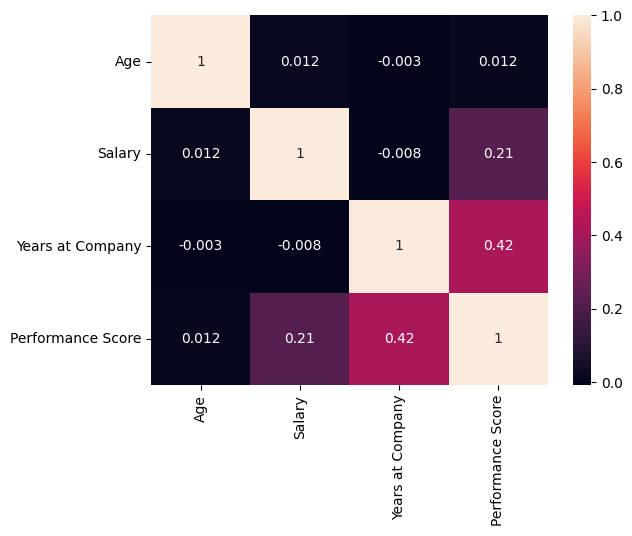

In [73]:
# Visualizing Dataset
sns.heatmap(corr, annot=True)

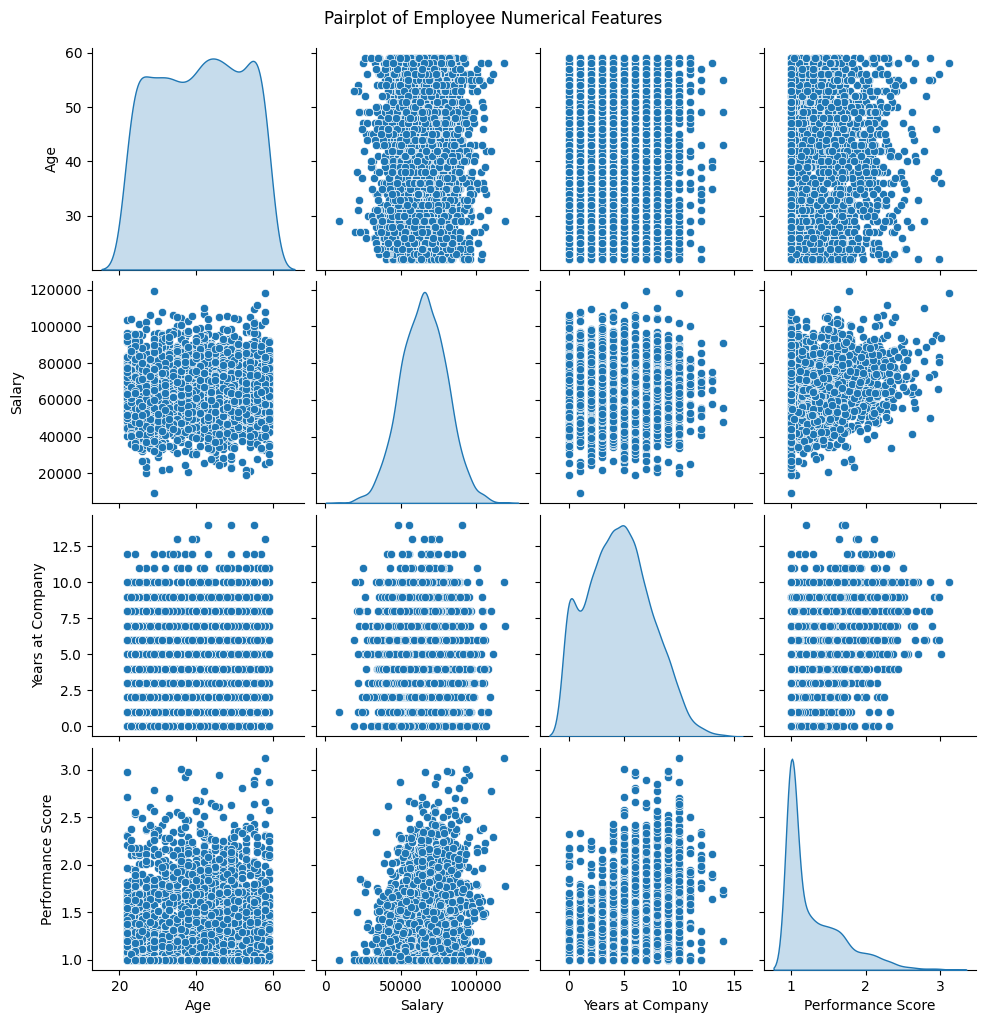

In [74]:
sns.pairplot(df[cols], diag_kind='kde')
plt.suptitle("Pairplot of Employee Numerical Features", y=1.02)
plt.show()

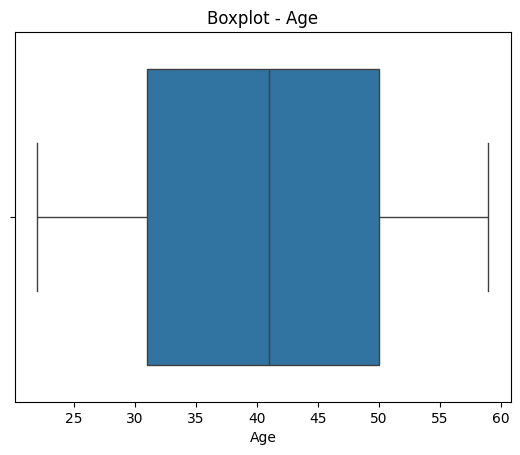

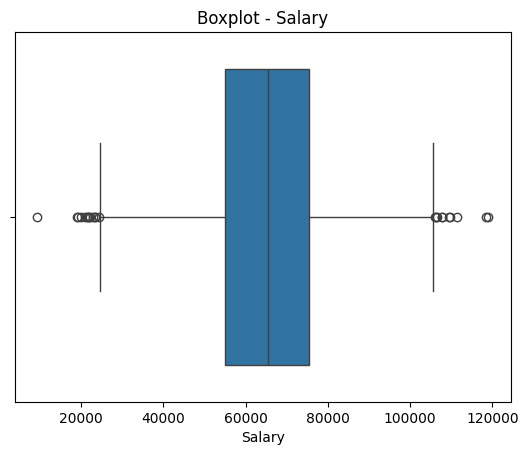

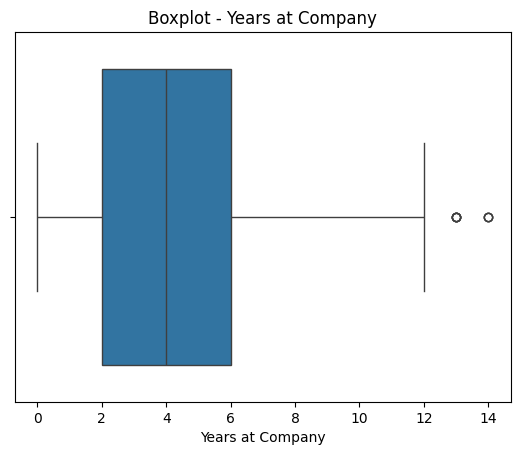

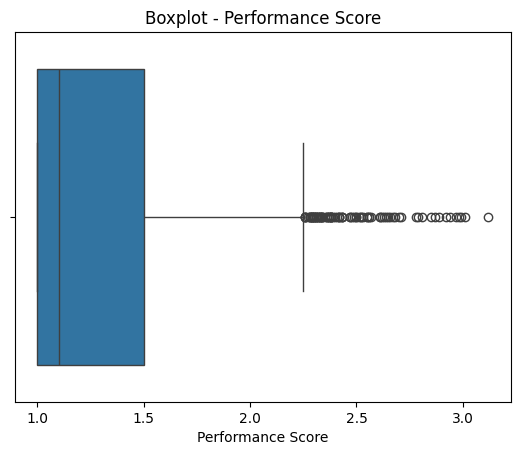

In [75]:
for col in cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

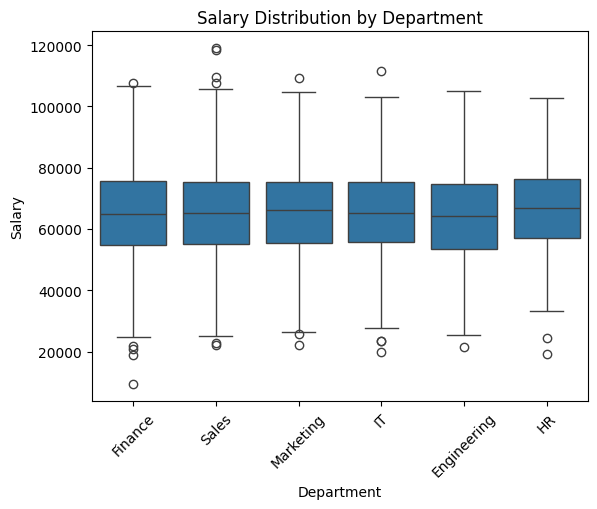

In [76]:
sns.boxplot(x='Department', y='Salary', data=df)
plt.title("Salary Distribution by Department")
plt.xticks(rotation=45)
plt.show()

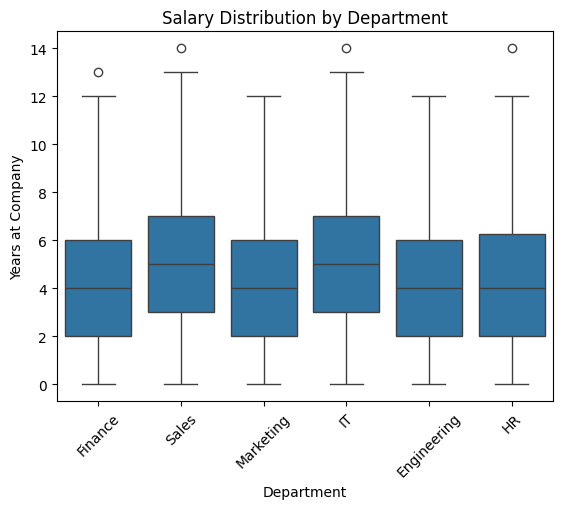

In [77]:
sns.boxplot(x='Department', y='Years at Company', data=df)
plt.title("Salary Distribution by Department")
plt.xticks(rotation=45)
plt.show()

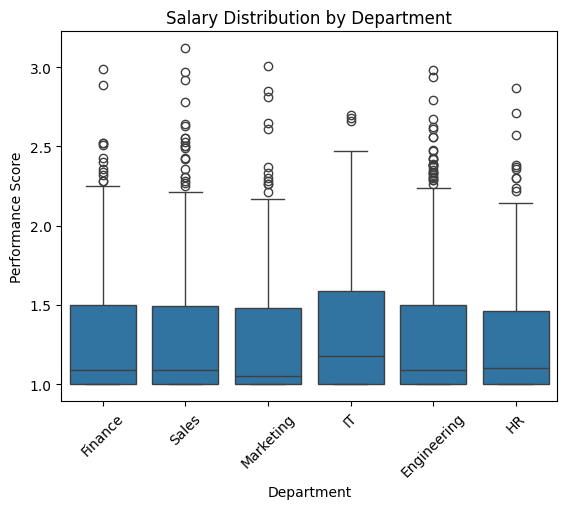

In [78]:
sns.boxplot(x='Department', y='Performance Score', data=df)
plt.title("Salary Distribution by Department")
plt.xticks(rotation=45)
plt.show()

### Step 3 - Probability and Statistical Analysis

In [79]:
### 1. PROBABILITY (Observed)

# Group-wise probability of attrition by Department
attrition_by_dept = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean())
attrition_by_dept_percent = (attrition_by_dept * 100).round(2).astype(str) + '%'

# Group-wise probability of attrition by rounded Performance Score
df['PerfGroup'] = df['Performance Score'].round()
attrition_by_perf = df.groupby('PerfGroup')['Attrition'].apply(lambda x: (x == 'Yes').mean())
attrition_by_perf_percent = (attrition_by_perf * 100).round(2).astype(str) + '%'

print("Probability of Attrition by Department:")
print(attrition_by_dept_percent, end="\n\n")

print("Probability of Attrition by Performance Score:")
print(attrition_by_perf_percent, end="\n\n")

### 2. BAYES' THEOREM

# Example for Performance Score = 7
target_score = 7
p_attrition = (df['Attrition'] == 'Yes').mean()  # P(A)
p_perf_given_attr = df[df['Attrition'] == 'Yes']['PerfGroup'].value_counts(normalize=True).get(target_score, 0)  # P(B|A)
p_perf = (df['PerfGroup'] == target_score).mean()  # P(B)

# Bayes' Theorem
if p_perf > 0:
    p_attrition_given_perf = (p_perf_given_attr * p_attrition) / p_perf
    print(f"P(Attrition | Performance Score = {target_score}) using Bayes Theorem: {round(p_attrition_given_perf*100, 2)}%")
else:
    print(f"No employees with Performance Score = {target_score} found.")

print()

### 3. HYPOTHESIS TESTING (ANOVA) Since there more than 2 departments.

# Prepare data for ANOVA
departments = df['Department'].unique()
scores_by_dept = [df[df['Department'] == dept]['Performance Score'] for dept in departments]

# Run one-way ANOVA
f_stat, p_val = f_oneway(*scores_by_dept)

print("Test for Mean Performance Score across Departments:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject the null hypothesis: Performance scores differ across departments.")
else:
    print("Fail to reject the null hypothesis: No significant difference in performance scores across departments.")

Probability of Attrition by Department:
Department
Engineering    87.97%
Finance        88.16%
HR             87.83%
IT             87.18%
Marketing      87.36%
Sales          87.95%
Name: Attrition, dtype: object

Probability of Attrition by Performance Score:
PerfGroup
1.0    90.25%
2.0    84.25%
3.0      0.0%
Name: Attrition, dtype: object

No employees with Performance Score = 7 found.

Test for Mean Performance Score across Departments:
F-statistic: 1.5340
P-value: 0.1758
Fail to reject the null hypothesis: No significant difference in performance scores across departments.


## Phase 2 - Predictive Modeling

### Step 4 - Feature Engineering and Encoding

In [80]:
# Only scale for models that need it
scaler = StandardScaler()
scaled_features = df.copy()

# slrady done this cols = ['Age', 'Salary', 'Years at Company', 'Performance Score']
scaled_features[cols] = scaler.fit_transform(df[cols])

# Preview processed data
scaled_features.head()

# I am not even using this block of code


,Age,Department,Salary,Years at Company,Performance Score,Attrition,PerfGroup
0,0.835099,Finance,-0.367882,1.921409,-0.749678,Yes,1.0
1,-0.436487,Sales,2.619591,0.868839,-0.749678,Yes,1.0
2,-1.072280,Sales,2.051117,-0.534589,0.509148,Yes,1.0
3,0.108478,Marketing,0.286054,0.167125,-0.749678,Yes,1.0
4,-0.073177,IT,0.404028,0.167125,1.125716,Yes,2.0


In [81]:
# Encode target variable 'Attrition' (Yes/No -> 1/0)
le_attrition = LabelEncoder()
df['Attrition'] = le_attrition.fit_transform(df['Attrition'])

# One-hot encode 'Department' column
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

### Step - 5 Employee Attrition Prediction Model

In [82]:
df.head()

,Age,Salary,Years at Company,Performance Score,Attrition,PerfGroup,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales
0,50,59681.64,10,1.00,1,1.0,True,False,False,False,False
1,36,104471.61,7,1.00,1,1.0,False,False,False,False,True
2,29,95948.71,3,1.49,1,1.0,False,False,False,False,True
3,42,69485.83,5,1.00,1,1.0,False,False,False,True,False
4,40,71254.58,5,1.73,1,2.0,False,False,True,False,False


Accuracy: 0.8933333333333333
Precision: 0.8976109215017065
Recall: 0.9924528301886792
F1-Score: 0.942652329749104


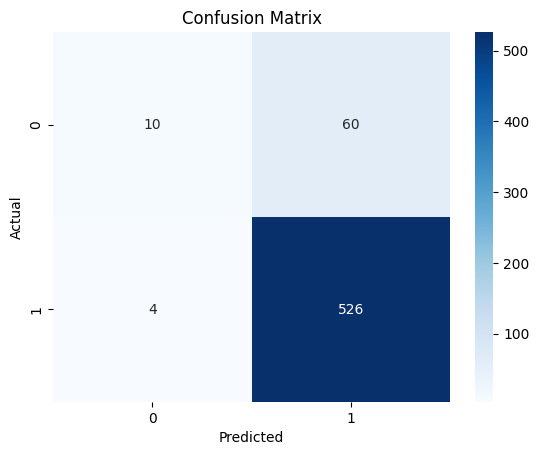

In [83]:
# Define features and target
X = df.drop(['Attrition'], axis=1, errors='ignore')  # drop non-numeric or irrelevant columns
y = df['Attrition']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Train model
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Step 6 - Employee Performance Prediction Model

In [84]:
df.head()

,Age,Salary,Years at Company,Performance Score,Attrition,PerfGroup,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales
0,50,59681.64,10,1.00,1,1.0,True,False,False,False,False
1,36,104471.61,7,1.00,1,1.0,False,False,False,False,True
2,29,95948.71,3,1.49,1,1.0,False,False,False,False,True
3,42,69485.83,5,1.00,1,1.0,False,False,False,True,False
4,40,71254.58,5,1.73,1,2.0,False,False,True,False,False


R-squared (R²): 0.8078050661932246
Mean Squared Error (MSE): 0.03020363693371481


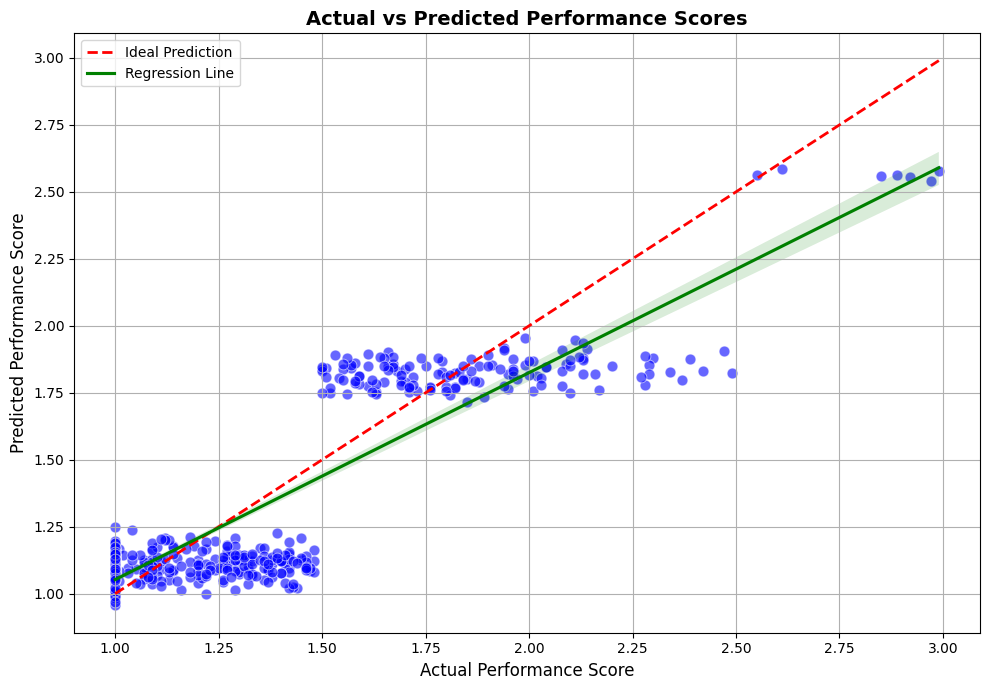

In [85]:
# Define features and target
X = df.drop(['Performance Score'], axis=1, errors='ignore')  # drop non-numeric or irrelevant columns
y = df['Performance Score']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize Random Forest
lr_clf = LinearRegression()

# Train model
lr_clf.fit(X_train, y_train)

# Predict on test set
y_pred = lr_clf.predict(X_test)

# Evaluate
print("R-squared (R²):", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

# Visualize
# Scatter plot with density, regression, and error lines
plt.figure(figsize=(10, 7))

# Scatter points
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", s=60, edgecolor='w')

# Identity line (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Prediction')

# Trend line (actual model fit)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='green', label='Regression Line')

# Titles and labels
plt.xlabel("Actual Performance Score", fontsize=12)
plt.ylabel("Predicted Performance Score", fontsize=12)
plt.title("Actual vs Predicted Performance Scores", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

## Phase 3 - Deep Learning Models

### Step 7 - Deep Learning for Employee Performance Prediction

In [86]:
df.head()

,Age,Salary,Years at Company,Performance Score,Attrition,PerfGroup,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales
0,50,59681.64,10,1.00,1,1.0,True,False,False,False,False
1,36,104471.61,7,1.00,1,1.0,False,False,False,False,True
2,29,95948.71,3,1.49,1,1.0,False,False,False,False,True
3,42,69485.83,5,1.00,1,1.0,False,False,False,True,False
4,40,71254.58,5,1.73,1,2.0,False,False,True,False,False


In [87]:
# Define features and target
X = df.drop(columns=["Performance Score"], errors='ignore')
y = df["Performance Score"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9610 - val_loss: 0.0531
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0509 - val_loss: 0.0418
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0388 - val_loss: 0.0375
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0313 - val_loss: 0.0384
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0335 - val_loss: 0.0366
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0330 - val_loss: 0.0363
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0286 - val_loss: 0.0360
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0300 - val_loss: 0.0388
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0299 - val_loss: 0.0388
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0312 - val_loss: 0.0387
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0292 - val_loss: 0.0365
Epoch 12/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

### Step 8 - Employee Attrition Analysis with Deep Learning

In [88]:
df.head()

,Age,Salary,Years at Company,Performance Score,Attrition,PerfGroup,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales
0,50,59681.64,10,1.00,1,1.0,True,False,False,False,False
1,36,104471.61,7,1.00,1,1.0,False,False,False,False,True
2,29,95948.71,3,1.49,1,1.0,False,False,False,False,True
3,42,69485.83,5,1.00,1,1.0,False,False,False,True,False
4,40,71254.58,5,1.73,1,2.0,False,False,True,False,False


In [89]:
# Define features and target
X = df.drop(columns=["Attrition"], errors='ignore')
y = df["Attrition"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Predict on test set
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"\nModel Evaluation Metrics:")
print(f"Accuracy :  {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall   :  {recall:.4f}")
print(f"F1-Score :  {f1:.4f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7521 - loss: 0.5303 - val_accuracy: 0.8833 - val_loss: 0.3412
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8709 - loss: 0.3641 - val_accuracy: 0.8833 - val_loss: 0.3357
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8834 - loss: 0.3323 - val_accuracy: 0.8833 - val_loss: 0.3333
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8824 - loss: 0.3342 - val_accuracy: 0.8854 - val_loss: 0.3309
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8974 - loss: 0.3036 - val_accuracy: 0.8854 - val_loss: 0.3310
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8853 - loss: 0.3307 - val_accuracy: 0.8875 - val_loss: 0.3276
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8774 - loss: 0.3387 - val_accuracy: 0.8875 - val_loss: 0.3284
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8844 - loss: 0.3258 - val_accuracy: 0.8875 - val_

## Phase 4 - Reporting and Insights

### Step 9 - Insights and Recommendations

#### Key Findings:

1. Performance Score Variance: The ANOVA test indicated a significant difference in mean performance scores across different departments. This suggests that departmental factors play a role in employee performance.
2. Attrition Probability: The observed probability of attrition varied across departments and performance score groups. Some departments and performance score ranges have a higher likelihood of employees leaving.
3. Predictive Model Insights:
  - The Random Forest model for attrition prediction provides insight into features that are important for predicting whether an employee will leave.
  - The Linear Regression and Deep Learning models for performance prediction indicate the extent to which various features explain and predict an employee's performance score.

#### Recommendations:

1. Department-Specific Interventions: Given the difference in performance scores across departments and varying attrition rates, tailor strategies to specific departments.
  - Performance Improvement Plans: For departments with lower average performance scores, investigate underlying causes. This could involve reviewing training programs, management effectiveness, workload distribution, or resource availability. Implement targeted performance improvement plans for these departments.
  - Retention Strategies: Identify departments with high attrition probability. Conduct exit interviews to understand the reasons for leaving and implement retention strategies specific to those departments. This might include addressing compensation, work-life balance, career development opportunities, or company culture.
2. Targeted Employee Engagement Programs: Based on the analysis of attrition by performance score, focus on employee engagement programs that address the needs of employees in high-risk performance groups. For example, if employees with certain performance scores are more likely to leave, explore ways to improve their engagement, recognition, or support.


### Step 10 - Data Visualization and Reporting

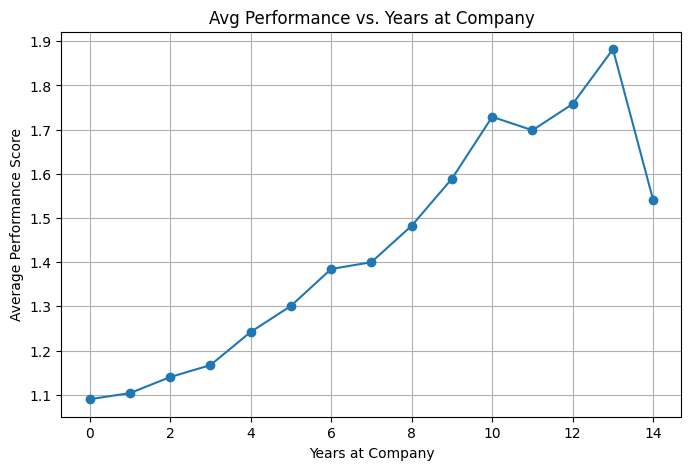

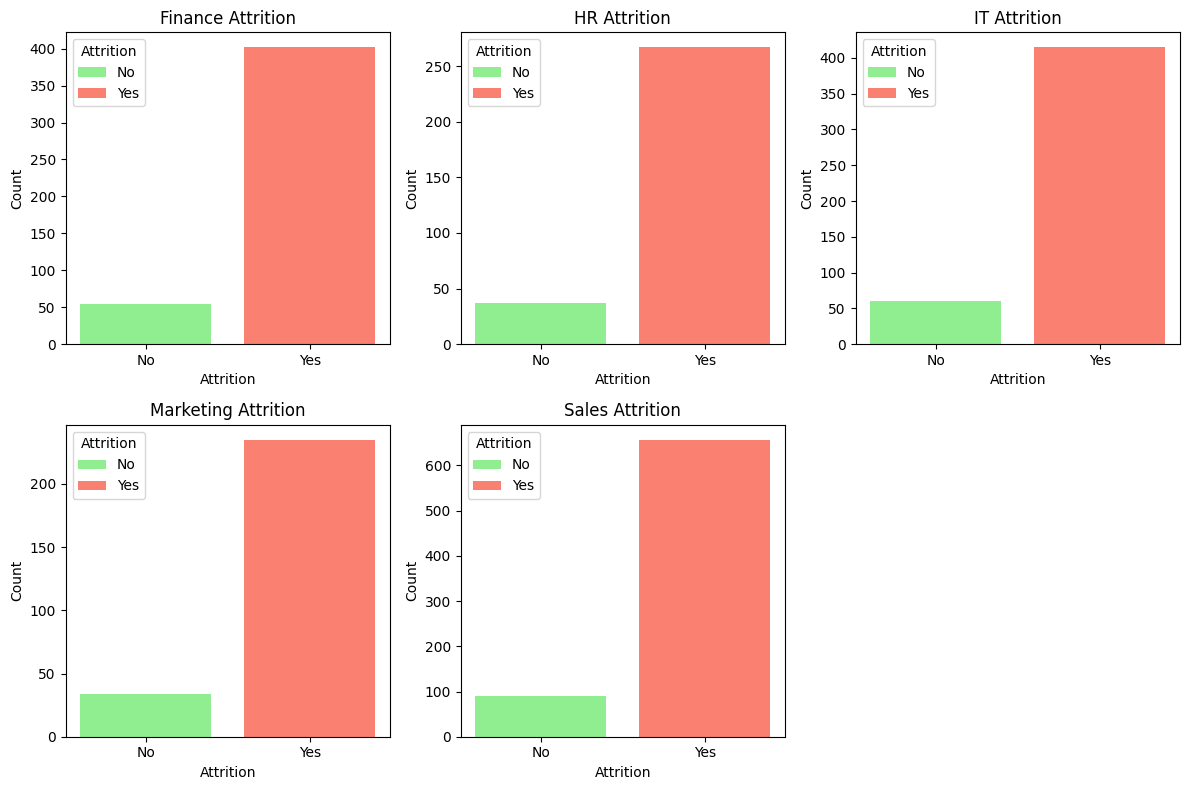

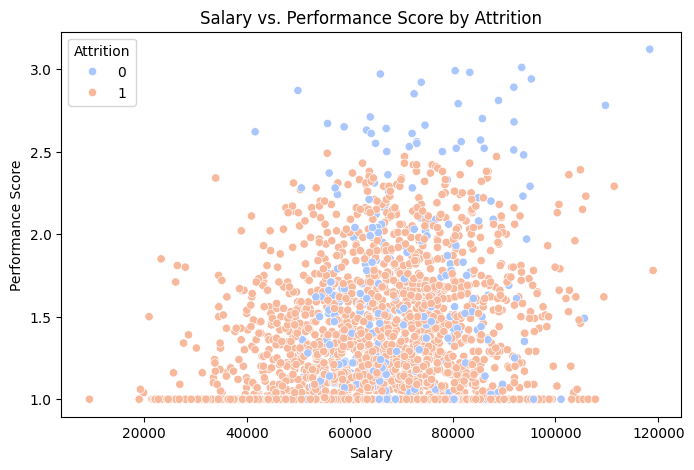

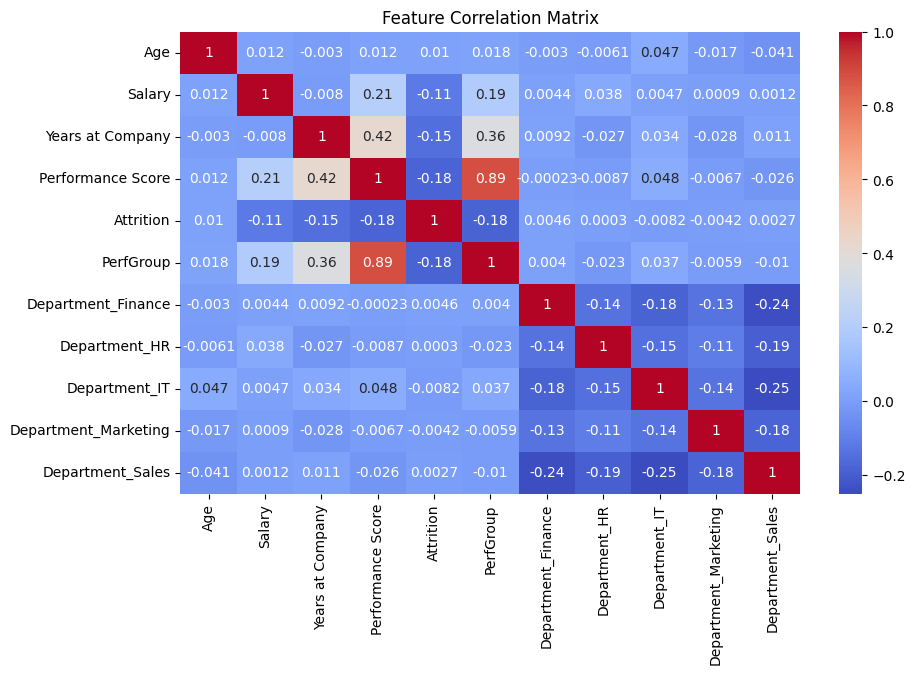

In [101]:
# Line Plot: Average Performance Score by Years at Company
plt.figure(figsize=(8,5))
df.groupby("Years at Company")["Performance Score"].mean().plot(marker='o')
plt.title("Avg Performance vs. Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Average Performance Score")
plt.grid(True)
plt.show()

# List of one-hot encoded department columns
departments = ['Department_Finance', 'Department_HR', 'Department_IT', 'Department_Marketing', 'Department_Sales']

# Create subplots
plt.figure(figsize=(12, 8))

for i, dept in enumerate(departments, 1):
    plt.subplot(2, 3, i)

    # Filter data for this department
    dept_df = df[df[dept] == 1]

    # Count 0 (No) and 1 (Yes) in Attrition column
    counts = dept_df['Attrition'].value_counts().sort_index()

    # Create bar plot
    bars = plt.bar(['No', 'Yes'], counts.values, color=['lightgreen', 'salmon'])

    # Title and labels
    plt.title(dept.replace('Department_', '') + ' Attrition')
    plt.xlabel('Attrition')
    plt.ylabel('Count')

    # Legend
    plt.legend(bars, ['No', 'Yes'], title="Attrition")

plt.tight_layout()
plt.show()
# Scatter Plot: Salary vs. Performance Score
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Salary", y="Performance Score", hue="Attrition", palette='coolwarm')
plt.title("Salary vs. Performance Score by Attrition")
plt.show()

# Heatmap: Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [106]:
df['Attrition'].value_counts()

,count
Attrition,
1,2634
0,366
